In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download ("https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saigunasekharreddy
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification


100%|██████████| 3.58G/3.58G [00:52<00:00, 73.6MB/s]


In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_dir = "/content/fruits-fresh-and-rotten-for-classification/dataset/train"
test_dir = "/content/fruits-fresh-and-rotten-for-classification/dataset/test"

# CLAHE preprocessing function
def apply_clahe(image):
    image = (image * 255).astype(np.uint8)
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    merged_lab = cv2.merge((cl, a, b))
    enhanced_image = cv2.cvtColor(merged_lab, cv2.COLOR_LAB2RGB)
    enhanced_image = enhanced_image.astype(np.float32) / 255.0
    return enhanced_image

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=apply_clahe
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    preprocessing_function=apply_clahe
)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 # Create ImageDataGenerators for training and testing
train_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize pixel values
test_datagen = ImageDataGenerator(rescale=1.0/255)
 # Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
 )
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
 )


Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [ ]:
print(train_generator.class_indices)  # Should display a dictionary of class labels
print(train_generator.samples)       # Number of images found in the training director

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
10901


In [ ]:
from IPython.display import display, Image
# Getting labels of training data
import os
labels = os.listdir ('/content/fruits-fresh-and-rotten-for-classification/dataset/train')
labels
num = []

for i in labels:
  path = '/content/fruits-fresh-and-rotten-for-classification/dataset/train/{0}/'.format(i)
  folder_data = os.listdir(path)
  k=0
  print('\n', i.upper())
  for j in folder_data:
    if(k<2):
      display(Image(path+j))
    k=k+1
  num.append(k)
  print('there are ', k,' images in ', i, 'class')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')  # 6 neurons for 6 classes
 ])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150, 150),batch_size=32,class_mode='categorical')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=9
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/9
340/340 ━━━━━━━━━━━━━━━━━━━━ 447s 1s/step - accuracy: 0.6911 - loss: 0.9183 - val_accuracy: 0.8728 - val_loss: 0.3468
Epoch 2/9
  1/340 ━━━━━━━━━━━━━━━━━━━━ 5:37 995ms/step - accuracy: 0.9062 - loss: 0.3158

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


340/340 ━━━━━━━━━━━━━━━━━━━━ 34s 96ms/step - accuracy: 0.9062 - loss: 0.3158 - val_accuracy: 0.8728 - val_loss: 0.3475
Epoch 3/9
340/340 ━━━━━━━━━━━━━━━━━━━━ 470s 1s/step - accuracy: 0.9140 - loss: 0.2309 - val_accuracy: 0.9252 - val_loss: 0.2071
Epoch 4/9
340/340 ━━━━━━━━━━━━━━━━━━━━ 41s 118ms/step - accuracy: 0.9062 - loss: 0.2308 - val_accuracy: 0.9126 - val_loss: 0.2545
Epoch 5/9
340/340 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - accuracy: 0.9526 - loss: 0.1312 - val_accuracy: 0.9405 - val_loss: 0.1696
Epoch 6/9
340/340 ━━━━━━━━━━━━━━━━━━━━ 41s 117ms/step - accuracy: 0.9688 - loss: 0.0596 - val_accuracy: 0.9386 - val_loss: 0.1740
Epoch 7/9
340/340 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.9725 - loss: 0.0813 - val_accuracy: 0.9628 - val_loss: 0.1029
Epoch 8/9
340/340 ━━━━━━━━━━━━━━━━━━━━ 42s 119ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9613 - val_loss: 0.1059
Epoch 9/9
340/340 ━━━━━━━━━━━━━━━━━━━━ 499s 1s/step - accuracy: 0.9855 - loss: 0.0393 - val_accuracy: 0.966

In [ ]:
import numpy as np
import cv2
from tkinter import Tk
from tkinter.filedialog import askopenfilename
 # Save the entire model to a file
model.save("fruit_quality_model_clahe.h5")
 # Load the saved model
model = tf.keras.models.load_model("fruit_quality_model_clahe.h5")

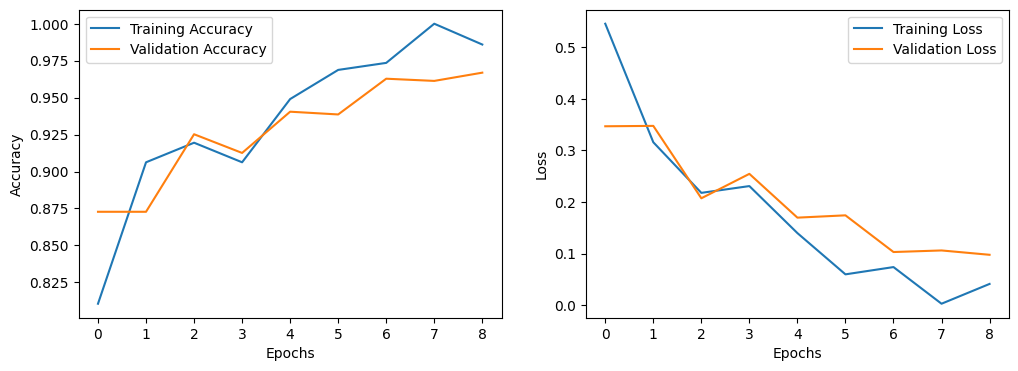

In [ ]:
# === Plot Accuracy and Loss ===
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 # Define dataset paths

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/fruit_quality_model_clahe.h5')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/fruits-fresh-and-rotten-for-classification/dataset/test',
    target_size=(150,150),  # Replace with your model's input size
    batch_size=32,
    class_mode='categorical',  # or 'binary' if only 2 classes
    shuffle=False
)

Found 2698 images belonging to 6 classes.


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Get predictions
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# Print metrics
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 34s 402ms/step
Accuracy: 0.9662713120830244
Classification Report:
               precision    recall  f1-score   support

  freshapples       0.94      0.99      0.97       395
  freshbanana       0.98      0.99      0.99       381
 freshoranges       0.96      0.97      0.97       388
 rottenapples       0.97      0.94      0.95       601
 rottenbanana       0.99      0.99      0.99       530
rottenoranges       0.95      0.92      0.94       403

     accuracy                           0.97      2698
    macro avg       0.96      0.97      0.97      2698
 weighted avg       0.97      0.97      0.97      2698

Confusion Matrix:
[[392   2   0   1   0   0]
 [  1 379   0   1   0   0]
 [  0   0 377   2   0   9]
 [ 22   3   3 563   1   9]
 [  0   1   0   3 524   2]
 [  1   2  13  12   3 372]]


<ipython-input-24-5b6813f4aa6d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=class_accuracies, palette="coolwarm")


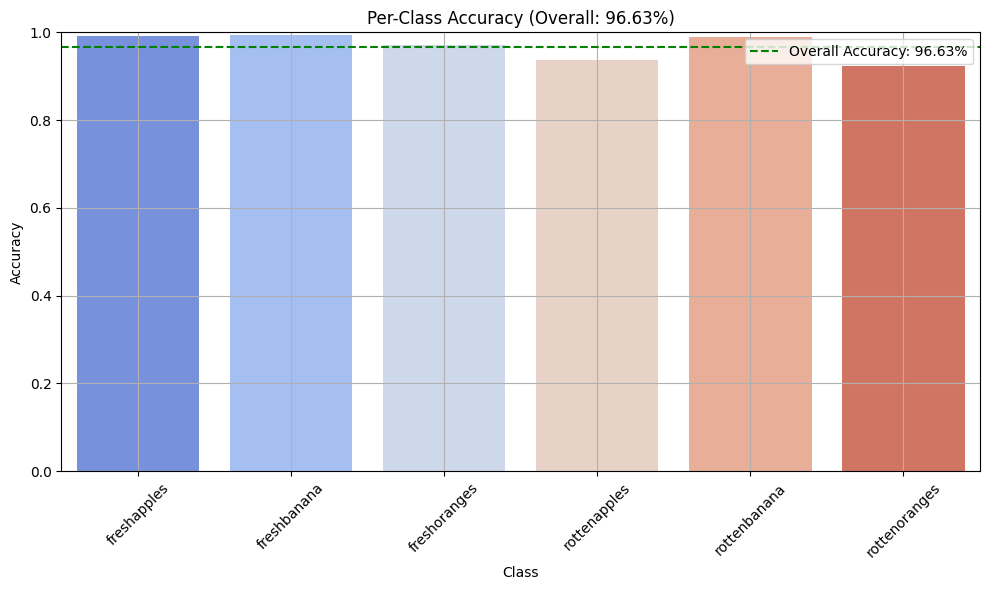

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


# Get class names in correct index order
class_names = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_accuracies = cm.diagonal() / cm.sum(axis=1)

# Overall accuracy
overall_acc = accuracy_score(y_true, y_pred)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=class_accuracies, palette="coolwarm")
plt.axhline(overall_acc, color='green', linestyle='--', label=f'Overall Accuracy: {overall_acc:.2%}')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xlabel("Class")
plt.title(f"Per-Class Accuracy (Overall: {overall_acc:.2%})")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted class: rottenapples


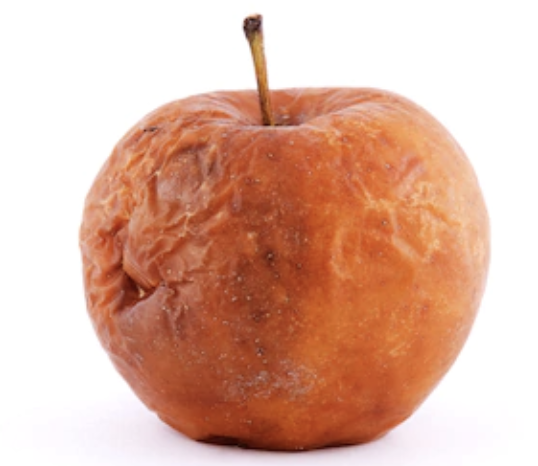

In [ ]:

import cv2
def preprocess_image(image_path):
    img = cv2.imread(image_path)                     # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)       # Convert to RGB
    img = cv2.resize(img, (150, 150))                # Resize to 150x150
    img = img / 255.0                                # Normalize pixel values
    img = np.expand_dims(img, axis=0)                # Add batch dimension
    return img


def predict(image_path):
    model = tf.keras.models.load_model("/content/fruit_quality_model_clahe.h5")
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction)

    class_names = {
        0: 'freshapples',
        1: 'freshbanana',
        2: 'freshoranges',
        3: 'rottenapples',
        4: 'rottenbanana',
        5: 'rottenoranges'
    }
    return class_names[predicted_class]
import matplotlib.pyplot as plt
test_image = '/content/fruits-fresh-and-rotten-for-classification/dataset/train/rottenapples/Screen Shot 2018-06-07 at 2.17.25 PM.png'
result = predict(test_image)
print(f"Predicted class: {result}")



import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread(test_image)  # Load image
cv2_imshow(image)  # Display image